In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from bs4 import BeautifulSoup
import codecs
import regex as re
import requests
import time

from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [92]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait       
from selenium.webdriver.common.by import By       
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common import action_chains

In [2]:
data = pd.read_csv('Data/OnlineNewsPopularity.csv')
scrape = pd.read_csv('Data/Raw Text.csv')

In [238]:
html = "https://www.forbes.com/sites/sarahhansen/2020/11/25/a-government-shutdown-is-just-days-away-heres-what-that-means-for-stimulus-funding/?sh=6d76531030c4"
page = requests.get(html).text
soup = BeautifulSoup(page, 'html.parser')


In [269]:
p = soup.findAll('div', class_="article-body fs-article fs-responsive-text current-article article-topline")
p_list = []
for i in p:
    all_p = i.find_all('p')
    for a in all_p:
        print(a.get_text())

With a December 11 government shutdown looming, lawmakers have reached a deal on the overall totals for a $1.4 trillion federal budget, Politico reported Monday evening, but they’ll only have two weeks to finalize the bill before the deadline, and it’s too early to tell whether any additional coronavirus relief will be included in that legislation. 
Speaker of the House Nancy Pelosi (D-Calif.), speaks during her weekly press briefing on Capitol ... [+] Hill on November 20, 2020. 
Roll Call reported Monday that the Thanksgiving holiday was seen as a crucial deadline for appropriators to reach an agreement on the budget so that staff could have enough time to draft the omnibus spending bill and pass it before the December deadline. 
Lawmakers had originally aimed to reach an agreement on an omnibus spending bill for all of 2021—not a temporary continuing resolution—by the end of last week. 
But negotiators encountered roadblocks, including over the nearly $2 billion that the GOP wants to

In [52]:
# Testing headless driver but it doesn't work

chromeOptions = Options()
chromeOptions.headless = True
chromeOptions.add_argument('window-size=1920x1080')
chromeOptions.add_argument("C:\Users\alice\AppData\Local\Google\Chrome\User Data")

driver = webdriver.Chrome(PATH, options=chromeOptions)
driver.get("https://www.forbes.com/innovation")

wait = WebDriverWait(driver, 5)
element = wait.until(lambda driver: driver.find_element_by_xpath("//*[@class='load-more']"))
driver.execute_script("arguments[0].click();", element)

TimeoutException: Message: 


In [79]:
PATH = "C:\chromedriver.exe"
#options = webdriver.ChromeOptions()
#options.add_argument(r"C:\Users\alice\AppData\Local\Google\Chrome\User Data\Default")
driver = webdriver.Chrome(PATH)
driver.get("https://www.forbes.com/sites/johnbbrandon/2020/11/25/tim-tebow-launches-a-new-social-media-app-meant-to-stop-the-trolls/?sh=2ff110f15b2e")


In [80]:
day = []
time = []
t = driver.find_elements_by_tag_name('time')
for i in t:
    day.append(i.text)
full_time = " ".join(day)
time.append(full_time)
time


['Nov 25, 2020, 08:56am EST']

In [82]:
topic = driver.find_element_by_xpath("//a[@class='remove-underline']")
topic.text

'Social Media'

In [258]:
len(hrefs_unique)

106

In [151]:
# Write a function to get unique links 
# Return unique links and links that have many other links in it
def get_unique_hrefs():
    hrefs = []
    if driver.find_elements_by_xpath("//a[@href]"):
        href = driver.find_elements_by_xpath("//a[@href]")
        for i in href:
            hrefs.append(i.get_attribute("href"))
    unique_hrefs = [x for x in hrefs if x.startswith("https://www.forbes.com/") and len(x) >=80]
    nested_hrefs = [x for x in hrefs if x.startswith("https://www.forbes.com/") and len(x) >=30 and len(x) < 80]
    return np.unique(unique_hrefs), np.unique(nested_hrefs)

# Write a function to get content per article and return all features of interest
def get_content(href):
    # Set up to get views, links, paragraphs,titles,and categories, time, topic for one article
    views = []
    links = []
    para = []
    titles = []
    times = []
    topics = []
    
    # Get views, if there is view, get all the features
    vi = driver.find_elements_by_class_name("pageviews")
    for i in vi:
        links.append(href)
        views.append(i.text)
        titles.append(driver.title)
        topic = driver.find_element_by_xpath("//a[@class='remove-underline']")
        topics.append(topic.text)
        
        article_p = []
        paragraphs = driver.find_elements_by_tag_name('p')
        for paragraph in paragraphs:
            article_p.append(paragraph.text)
        full_paragraph = "".join(article_p)
        para.append(full_paragraph)
        
        day = []
        t = driver.find_elements_by_tag_name('time')
        for i in t:
            day.append(i.text)
        full_time = " ".join(day)
        times.append(full_time)

    return links, titles, para, views, topics, times


In [ ]:
# Ready to scrape
# Setting up path and driver
# Don't run options headless because it will not click, timeout error 
# Make sure to set user data dir or you will not be logged in
# Make sure you've already logged in with username and password, click remembered box
PATH = "C:\chromedriver.exe"
options = Options()
options.add_argument('--no-sandbox')
options.add_argument("start-maximized")
options.add_argument("user-data-dir=C:\\Users\\alice\\AppData\\Local\\Google\\Chrome\\User Data")
driver = webdriver.Chrome(executable_path=PATH, options=options)

In [ ]:
# Ready to scrape
# Setting up path and driver
# Don't run options headless because it will not click, timeout error 
# Make sure to set user data dir or you will not be logged in
# Make sure you've already logged in with username and password, click remembered box
PATH = "C:\chromedriver.exe"
options = Options()
options.add_argument('--no-sandbox')
options.add_argument("start-maximized")
options.add_argument("user-data-dir=C:\\Users\\alice\\AppData\\Local\\Google\\Chrome\\User Data")
driver = webdriver.Chrome(executable_path=PATH, options=options)

# One single topic instead of two or more, easier to manage
# Two dataframes, one for second nested links
topics = ['innovation']
hrefs = []
category = []
df3 = pd.DataFrame(columns=['link', 'title', 'text', 'view', 'topic', 'time'])
df4 = pd.DataFrame(columns=['link', 'title', 'text', 'view', 'topic', 'time'])


for topic in topics:
    url = "https://www.forbes.com/" + str(topic)
    driver.get(url)
        
    # Get specific range of clicks on button to load more articles, wait in-between each click
    for i in range(1):
        wait = WebDriverWait(driver, 10)
        element = wait.until(lambda driver: driver.find_element_by_xpath("//*[@class='load-more']"))
        driver.execute_script("arguments[0].click();", element)
        time.sleep(10)
        
    # Get all hrefs in that fully loaded site after 6 clicks
    all_hrefs = get_unique_hrefs()
    unique_hrefs = all_hrefs[0]
    nested_hrefs = all_hrefs[1]
    
    # Go over the unique links and get content if there is view
    # Deposit in the first dataframe row
    for i, link in enumerate(unique_hrefs):
        driver.get(link)
        if driver.find_elements_by_class_name("pageviews"):
            content = get_content(link)
            df3.loc[i] = [content[0], content[1], content[2], content[3], content[4], content[5]]
        else:
            pass
        
    # Go over the nested links and get unique links
    for i in nested_hrefs:
        more_hrefs = get_unique_hrefs()[0]
        
    # Iterate over the unique links of the nested links earlier
    for i, link in enumerate(more_hrefs):
        driver.get(link)
        if driver.find_elements_by_class_name("pageviews"):
            content = get_content(link)
            df4.loc[i] = [content[0], content[1], content[2], content[3], content[4], content[5]]
        else:
            pass
        
dfs = pd.concat([df4, df3], ignore_index=True)
dfs.to_csv("df_innovation_1click.csv")

In [157]:
# Setting up path and driver
# Don't run options headless because it will not click, timeout error 
# Make sure to set user data dir or you will not be logged in
PATH = "C:\chromedriver.exe"
options = Options()
options.add_argument('--no-sandbox')
options.add_argument("start-maximized")
options.add_argument("user-data-dir=C:\\Users\\alice\\AppData\\Local\\Google\\Chrome\\User Data")
driver = webdriver.Chrome(executable_path=PATH, options=options)

# One single topic 
topics = ['shopping']
hrefs = []
category = []
df = pd.DataFrame(columns=['link', 'title', 'text', 'view', 'topic', 'time'])
df2 = pd.DataFrame(columns=['link', 'title', 'text', 'view', 'topic', 'time'])


for topic in topics:
    url = "https://www.forbes.com/" + str(topic)
    driver.get(url)
        
    # Get specific range of clicks on button to load more articles, wait in-between each click
    for i in range(1):
        wait = WebDriverWait(driver, 10)
        element = wait.until(lambda driver: driver.find_element_by_xpath("//*[@class='load-more']"))
        driver.execute_script("arguments[0].click();", element)
        time.sleep(10)
        
    # Get all hrefs in that fully loaded site after 6 clicks
    all_hrefs = get_unique_hrefs()
    unique_hrefs = all_hrefs[0]
    nested_hrefs = all_hrefs[1]
    
    
    for i, link in enumerate(unique_hrefs):
        driver.get(link)
        if driver.find_elements_by_class_name("pageviews"):
            content = get_content(link)
            df.loc[i] = [content[0], content[1], content[2], content[3], content[4], content[5]]
        else:
            pass
        
    for i in nested_hrefs:
        more_hrefs = get_unique_hrefs()[0]
        
        for i, link in enumerate(more_hrefs):
            driver.get(link)
            if driver.find_elements_by_class_name("pageviews"):
                content = get_content(link)
                df2.loc[i] = [content[0], content[1], content[2], content[3], content[4], content[5]]
            else:
                pass
        
dfs_shop = pd.concat([df, df2], ignore_index=True)
dfs_shop.to_csv("df_shopping.csv")

InvalidArgumentException: Message: invalid argument: user data directory is already in use, please specify a unique value for --user-data-dir argument, or don't use --user-data-dir


In [150]:
df

link                                              title  \
7   [687,503 views]  [The Net Worth Of Every 2020 Presidential Cand...   
83    [9,530 views]  [Walmart Black Friday 2020: Here Are Walmart’s...   
92  [172,856 views]  [Paste by WeTransfer BrandVoice: Paste It Forw...   
95   [67,434 views]  [ServiceNow BrandVoice: Using IoT Data To Driv...   

                                                 text  \
7   [E\nveryone knows Donald Trump is rich. But ho...   
83  [Walmart's blowout Black Friday sales are here...   
92  [For every business idea that launches into th...   
95  [When the term Internet of Things (IoT) first ...   

                           view            topic  \
7   [Aug 14, 2019, 06:00am EDT]   [Billionaires]   
83  [Nov 26, 2020, 03:37pm EST]  [Consumer Tech]   
92  [Sep 29, 2020, 09:47am EDT]     [Leadership]   
95  [Oct 15, 2020, 09:00am EDT]     [Innovation]   

                                                 time  
7   [https://www.forbes.com/sites/danalexander/201...  
83  [https://www.forbes.com/sites/gordonkelly/2020...  
92  [https://www.forbes.com/sites/pastebywetransfe...  
95  [https://www.forbes.com/sites/servicenow/2020/...

In [108]:
dfs_shop = pd.concat([df, df2], ignore_index=True)
dfs_shop.to_csv("df_shopping.csv")

In [106]:
df2

link                                              title  \
7   [687,503 views]  [The Net Worth Of Every 2020 Presidential Cand...   
83    [9,530 views]  [Walmart Black Friday 2020: Here Are Walmart’s...   
92  [172,856 views]  [Paste by WeTransfer BrandVoice: Paste It Forw...   
95   [67,434 views]  [ServiceNow BrandVoice: Using IoT Data To Driv...   

                                                 text  \
7   [E\nveryone knows Donald Trump is rich. But ho...   
83  [Walmart's blowout Black Friday sales are here...   
92  [For every business idea that launches into th...   
95  [When the term Internet of Things (IoT) first ...   

                           view            topic  \
7   [Aug 14, 2019, 06:00am EDT]   [Billionaires]   
83  [Nov 26, 2020, 03:37pm EST]  [Consumer Tech]   
92  [Sep 29, 2020, 09:47am EDT]     [Leadership]   
95  [Oct 15, 2020, 09:00am EDT]     [Innovation]   

                                                 time  
7   [https://www.forbes.com/sites/danalexander/201...  
83  [https://www.forbes.com/sites/gordonkelly/2020...  
92  [https://www.forbes.com/sites/pastebywetransfe...  
95  [https://www.forbes.com/sites/servicenow/2020/...

In [107]:
df2

link  \
4   [https://www.forbes.com/sites/danalexander/201...   
13  [https://www.forbes.com/sites/pastebywetransfe...   
14  [https://www.forbes.com/sites/servicenow/2020/...   

                                                title  \
4   [The Net Worth Of Every 2020 Presidential Cand...   
13  [Paste by WeTransfer BrandVoice: Paste It Forw...   
14  [ServiceNow BrandVoice: Using IoT Data To Driv...   

                                                 text             view  \
4   [E\nveryone knows Donald Trump is rich. But ho...  [687,605 views]   
13  [For every business idea that launches into th...  [172,931 views]   
14  [When the term Internet of Things (IoT) first ...   [68,254 views]   

             topic                         time  
4   [Billionaires]  [Aug 14, 2019, 06:00am EDT]  
13    [Leadership]  [Sep 29, 2020, 09:47am EDT]  
14    [Innovation]  [Oct 15, 2020, 09:00am EDT]

In [63]:
nested_hrefs

array(['https://www.forbes.com/30-under-30/2020/',
       'https://www.forbes.com/advisor/',
       'https://www.forbes.com/advisor/banking/best-cd-rates/',
       'https://www.forbes.com/advisor/banking/best-checking-accounts/',
       'https://www.forbes.com/advisor/banking/best-money-market-accounts/',
       'https://www.forbes.com/advisor/banking/best-online-banks/',
       'https://www.forbes.com/advisor/banking/best-online-savings-accounts/',
       'https://www.forbes.com/advisor/car-insurance/best-car-insurance-companies/',
       'https://www.forbes.com/advisor/car-insurance/car-insurance-quotes/',
       'https://www.forbes.com/advisor/credit-cards/best-credit-cards/',
       'https://www.forbes.com/advisor/credit-cards/best/0-apr/',
       'https://www.forbes.com/advisor/credit-cards/best/balance-transfer/',
       'https://www.forbes.com/advisor/credit-cards/best/business-cash-back/',
       'https://www.forbes.com/advisor/credit-cards/best/business/',
       'https://www.

In [158]:
lst = []

# Here the page starts at 1 and ends at 540 for 2019, ends at 394 for 2020.
# Change the number in "range" for pages, and change the year in "url" variable to
# change the year
for page in range(1, 2):
    url = "https://mashable.com/2019/?page=" + str(page)
    source = requests.get(url).text
    soup = BeautifulSoup(source, "html.parser")
    
    # Get all the links to articles at that page
    for art in soup.find_all("div", class_ = "article-container"):
        art = art.h2.a['href']
        lst.append(art)

    # Here parse each article and set link, title, article to a DataFrame
    # You can change the number in "range" to specify the number of articles to be parsed on
    # that page
    for i in range(len(lst)):
        link = lst[i]
        source = requests.get(link).text
        soup = BeautifulSoup(source, "html.parser")
        titles = soup.find("h1", class_ = "title")
        if titles:
            title = titles.get_text().replace('\n', '')
        else:
            pass
        
        sect = soup.find("section", class_ = "article-content")
        if sect: 
            article = sect.get_text().replace('\n', '')
        else: 
            pass

        topics = soup.find('h2')
        if topics:
            topic = topics.get_text()
        else: 
            pass
        
        
        df.loc[i] = [link, title, article, topic]

In [120]:
for i in df.columns:
    print(df.loc[df[i] == 'NA'])

Empty DataFrame
Columns: [link, title, article]
Index: []
                                                  link title article
28   https://mashable.com/video/kylie-jenner-youtub...    NA      NA
32   https://mashable.com/reels/how-to-keep-your-pl...    NA      NA
34   https://mashable.com/reels/apple-watch-gold-ip...    NA      NA
37   https://mashable.com/video/autonomous-ferry-fi...    NA      NA
47     https://mashable.com/video/animals-extinct-2018    NA      NA
69   https://mashable.com/video/chance-the-rapper-s...    NA      NA
71   https://mashable.com/video/kim-kardashian-twee...    NA      NA
77   https://mashable.com/video/beyonce-jay-z-chall...    NA      NA
83   https://mashable.com/video/online-security-tip...    NA      NA
88   https://mashable.com/video/chinese-lunar-probe...    NA      NA
96   https://mashable.com/reels/5-reasons-to-ditch-...    NA      NA
100  https://mashable.com/video/beer-bot-lego-robot...    NA      NA
103  https://mashable.com/video/windows-10-mo

In [100]:
text = []
start = time.time() 
for page in urls[:1000]:
    r = requests.get(page).text
    soup = BeautifulSoup(r, 'html.parser')
    sec = soup.find('section')
    
    if sec: 
        sec.get_text()
        text.append(sec)
    else: 
        print(page)
end = time.time()
print('Time Elapsed: {}'.format(end-start))
dic = {'url': urls[:1000], 'title': text': text}
data = pd.DataFrame(dic)

Time Elapsed: 744.4653704166412


In [103]:
data

url  \
0    http://mashable.com/2013/01/07/amazon-instant-...   
1    http://mashable.com/2013/01/07/ap-samsung-spon...   
2    http://mashable.com/2013/01/07/apple-40-billio...   
3    http://mashable.com/2013/01/07/astronaut-notre...   
4     http://mashable.com/2013/01/07/att-u-verse-apps/   
..                                                 ...   
995  http://mashable.com/2013/01/24/google-warrants...   
996  http://mashable.com/2013/01/24/hands-on-with-v...   
997  http://mashable.com/2013/01/24/hollywood-stars...   
998  http://mashable.com/2013/01/24/hypersonic-spac...   
999       http://mashable.com/2013/01/24/ibm-hydrogel/   

                                                  text  
0    [\n, [Having trouble finding something to watc...  
1    [\n, [The , [Associated Press],  is the latest...  
2    [\n, [It looks like 2012 was a pretty good yea...  
3    [\n, [When it comes to college football, NASA ...  
4    [\n, [LAS VEGAS — Sharing photos and videos on...  
..                                                 ...  
995  [\n, [Google revealed Wednesday that it always...  
996  [\n, [[\n, <p><img alt="Uploads%252fvideo uplo...  
997  [\n, [\n, [\n, <header>\n<h1>10 Movie Stars Wi...  
998  [\n, [A hypersonic "SpaceLiner" would whisk up...  
999  [\n, [[]], \n, [Biofilms — groups of microorga...  

[1000 rows x 2 columns]

In [3]:
data.columns = [x[1:] if x[0] == ' ' else x for x in data.columns]

In [9]:
urls = list(data['url'])

In [34]:
data.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 61 columns]

In [ ]:
df = pd.DataFrame(columns=['link', 'title', 'article'])
for i in range(1000):
    link = data['url'][i]
    source = requests.get(link).text
    soup = BeautifulSoup(source, "html.parser")
    title = soup.find("h1", class_ = "title").get_text()
    article = soup.find("section", class_ = "article-content").get_text()
    df.loc[i] = [link, title, article]
df.to_csv("scrape_mashable.csv")

In [21]:
num_imgs = data.groupby('num_imgs').agg({'shares' : ['sum']}).reset_index()

In [22]:
num_imgs.columns

MultiIndex([('num_imgs',    ''),
            (  'shares', 'sum')],
           )

In [23]:
num_imgs.columns = ["_".join(x) for x in num_imgs.columns.ravel()]

In [24]:
num_imgs.head()

num_imgs_  shares_sum
0        0.0    30713306
1        1.0    46631015
2        2.0     7699651
3        3.0     3803561
4        4.0     2082773

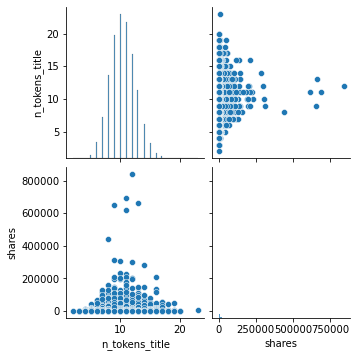

In [6]:
d2 = data.drop(['url', 'shares'], axis=1)

In [7]:
d2.head()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [8]:
cor_pear = []
cor_ken = []
cor_spe = []
for i in d2.columns:
    cor, _ = stats.pearsonr(data[i], data['shares'])
    cor2, _ = stats.kendalltau(data[i], data['shares'])
    cor3, _ = stats.spearmanr(data[i], data['shares'])
    cor_pear.append(cor)
    cor_ken.append(cor2)
    cor_spe.append(cor3)

In [9]:
dic = {'pears_cor': cor_pear,
      'ken_cor': cor_ken,
      'spe_cor': cor_spe}
cor_tbl = pd.DataFrame(dic, d2.columns)

In [10]:
cor_tbl.head()

pears_cor   ken_cor   spe_cor
timedelta          0.008662  0.021372  0.032019
n_tokens_title     0.008783 -0.028824 -0.040278
n_tokens_content   0.002459  0.006825  0.009675
n_unique_tokens    0.000806 -0.030676 -0.044842
n_non_stop_words   0.000443  0.006759  0.009646

In [11]:
pos_cor = cor_tbl[(cor_tbl['pears_cor'] > 0) & (cor_tbl['ken_cor'] > 0) & (cor_tbl['spe_cor'] > 0)].reset_index()

In [12]:
pos_cor.head()

index  pears_cor   ken_cor   spe_cor
0         timedelta   0.008662  0.021372  0.032019
1  n_tokens_content   0.002459  0.006825  0.009675
2  n_non_stop_words   0.000443  0.006759  0.009646
3         num_hrefs   0.045404  0.062433  0.090015
4          num_imgs   0.039388  0.062323  0.083114

In [13]:
subset = data[:500]

Text(0.5, 1.0, 'Correlations between Features and Shares')

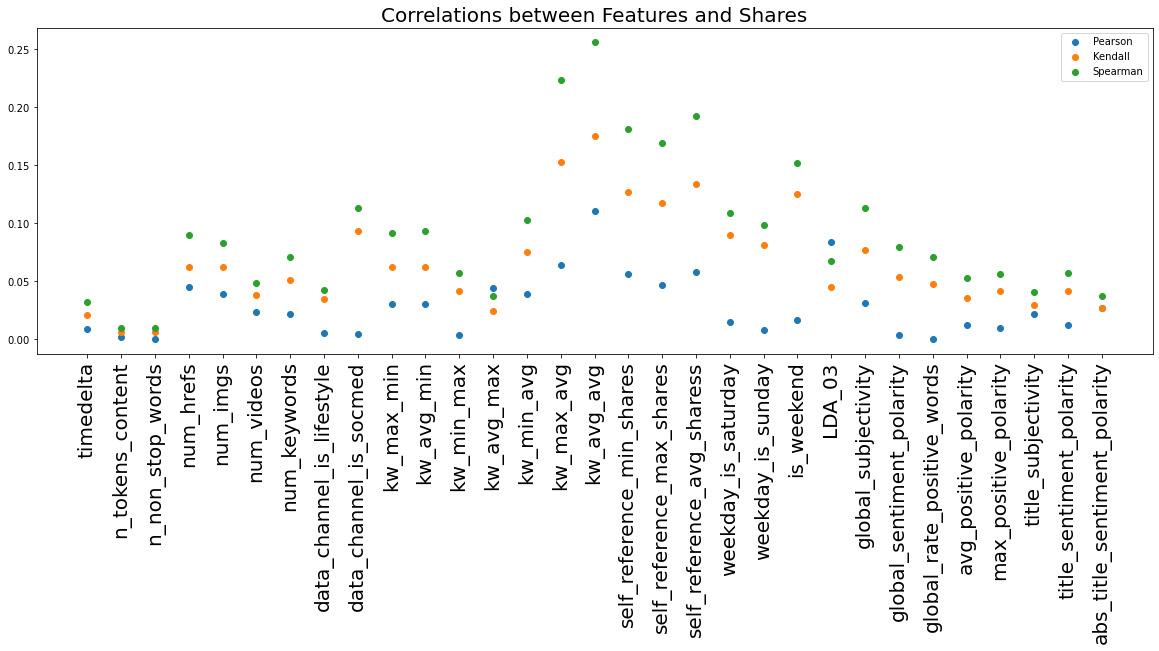

In [31]:
plt.figure(figsize=(20,6))
plt.scatter(pos_cor['index'],pos_cor['pears_cor'], label='Pearson')
plt.scatter(pos_cor['index'],pos_cor['ken_cor'], label='Kendall')
plt.scatter(pos_cor['index'],pos_cor['spe_cor'], label='Spearman')
plt.xticks(rotation=90, fontsize = 20)
plt.legend()
plt.title("Correlations between Features and Shares", fontsize=20)


In [39]:
scrape.head()

url  \
0  http://mashable.com/2013/01/07/amazon-instant-...   
1  http://mashable.com/2013/01/07/ap-samsung-spon...   
2  http://mashable.com/2013/01/07/apple-40-billio...   
3  http://mashable.com/2013/01/07/astronaut-notre...   
4   http://mashable.com/2013/01/07/att-u-verse-apps/   

                                               title  \
0  Amazon's Streaming Video Library Now a Little ...   
1  AP's Twitter to Begin Displaying Sponsored Tweets   
2      Apple's App Store Passes 40 Billion Downloads   
3   This Astronaut Is Rooting for Notre Dame Tonight   
4  New U-Verse Apps Simplify Sharing Photos and V...   

                                                text  
0  Having trouble finding something to watch on A...  
1  The Associated Press is the latest news organi...  
2  It looks like 2012 was a pretty good year for ...  
3  When it comes to college football, NASA astron...  
4  LAS VEGAS — Sharing photos and videos on your ...

In [43]:
join.columns

Index(['url', 'title', 'text', ' timedelta', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivit

In [45]:

cols = list(data.columns)


channel_types = []
for x in range(len(data)):
    if (data[cols[13]][x] == 1.0):
        channel_type = 'Lifestyle'
    elif (data[cols[14]][x] == 1.0):
        channel_type = 'Entertainment'
    elif (data[cols[15]][x] == 1.0):
        channel_type = 'Business'
    elif (data[cols[16]][x] == 1.0):
        channel_type = 'Social Media'
    elif (data[cols[17]][x] == 1.0):
        channel_type = 'Tech'
    elif (data[cols[18]][x] == 1.0):
        channel_type = 'World'
    else:
        channel_type = 'Na'
    channel_types.append(channel_type)

In [46]:
data['channel_type'] = channel_types

In [47]:
join = scrape.merge(data, on='url')

In [56]:
join.columns

Index(['url', 'title', 'text', ' timedelta', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivit

In [57]:
join[['url', 'title', 'channel_type', 'text', ' shares']]

url  \
0    http://mashable.com/2013/01/07/amazon-instant-...   
1    http://mashable.com/2013/01/07/ap-samsung-spon...   
2    http://mashable.com/2013/01/07/apple-40-billio...   
3    http://mashable.com/2013/01/07/astronaut-notre...   
4     http://mashable.com/2013/01/07/att-u-verse-apps/   
..                                                 ...   
981  http://mashable.com/2013/01/24/google-warrants...   
982  http://mashable.com/2013/01/24/hands-on-with-v...   
983  http://mashable.com/2013/01/24/hollywood-stars...   
984  http://mashable.com/2013/01/24/hypersonic-spac...   
985       http://mashable.com/2013/01/24/ibm-hydrogel/   

                                                 title   channel_type  \
0    Amazon's Streaming Video Library Now a Little ...  Entertainment   
1    AP's Twitter to Begin Displaying Sponsored Tweets       Business   
2        Apple's App Store Passes 40 Billion Downloads       Business   
3     This Astronaut Is Rooting for Notre Dame Tonight  Entertainment   
4    New U-Verse Apps Simplify Sharing Photos and V...           Tech   
..                                                 ...            ...   
981  Google Says It Always Requires Warrants for Us...           Tech   
982     Hands On With Twitter's Social Video App, Vine           Tech   
983     10 Movie Stars With Surprising Musical Talents  Entertainment   
984  In 2050, Flight Time From Europe to Australia ...           Tech   
985  IBM Creates Weapon to Destroy Drug-Resistant B...           Tech   

                                                  text   shares  
0    Having trouble finding something to watch on A...      593  
1    The Associated Press is the latest news organi...      711  
2    It looks like 2012 was a pretty good year for ...     1500  
3    When it comes to college football, NASA astron...     1200  
4    LAS VEGAS — Sharing photos and videos on your ...      505  
..                                                 ...      ...  
981  Google revealed Wednesday that it always requi...      785  
982   Twitter launched Vine on Thursday — an app th...     2400  
983  Did you know the Dirty Dancing soundtrack feat...     2300  
984  A hypersonic "SpaceLiner" would whisk up to 50...     5200  
985   Biofilms — groups of microorganisms that adhe...     3800  

[986 rows x 5 columns]